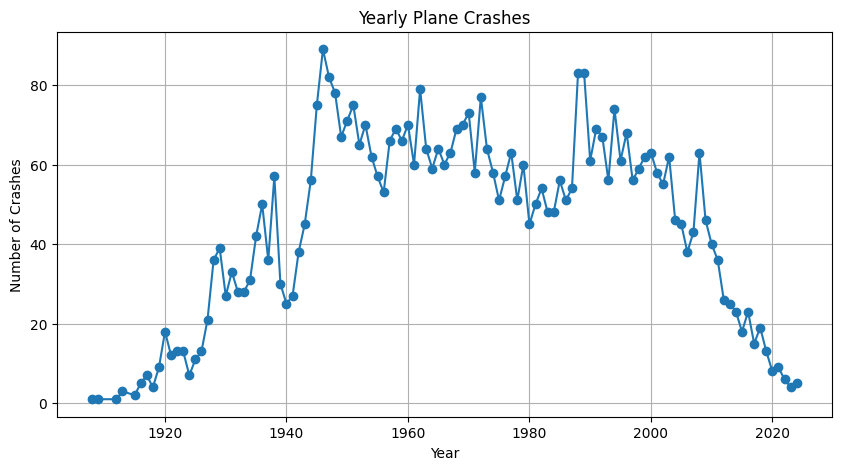

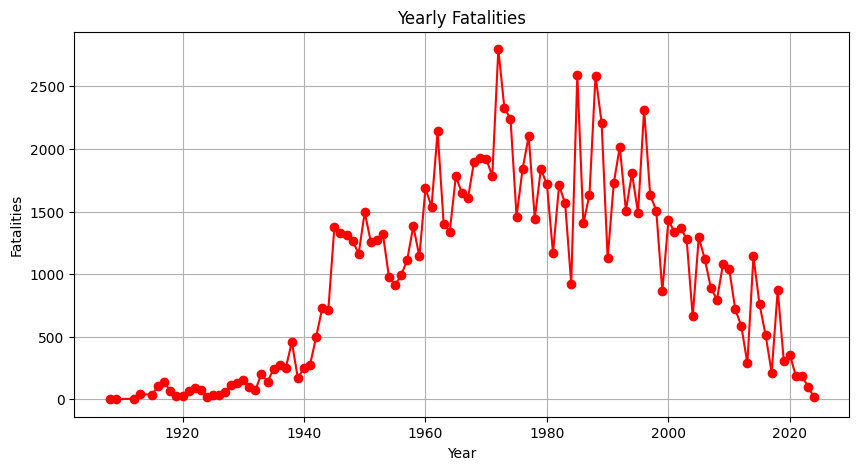

/tmp/ipython-input-819263656.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_crashes.values, y=airline_crashes.index, palette="Blues_r")


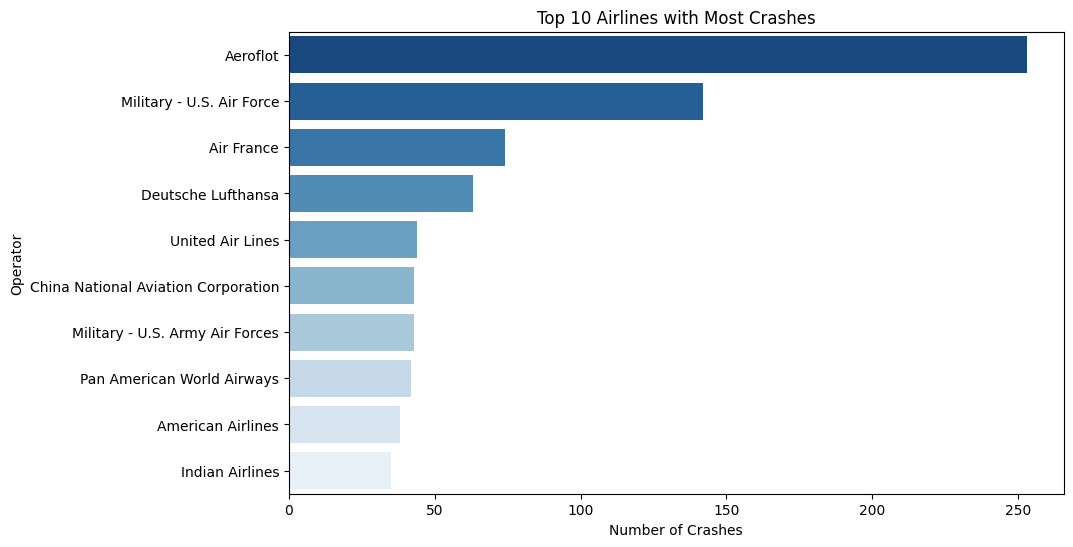

/tmp/ipython-input-819263656.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_fatalities.values, y=airline_fatalities.index, palette="Reds_r")


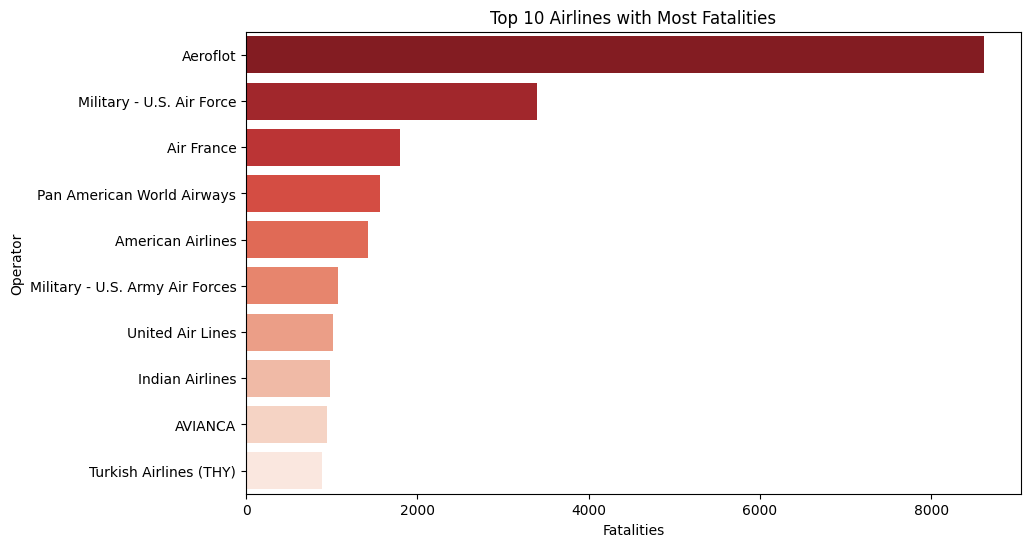

/tmp/ipython-input-819263656.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_survival["Survival Rate (%)"], y=top_survival.index, palette="Greens_r")


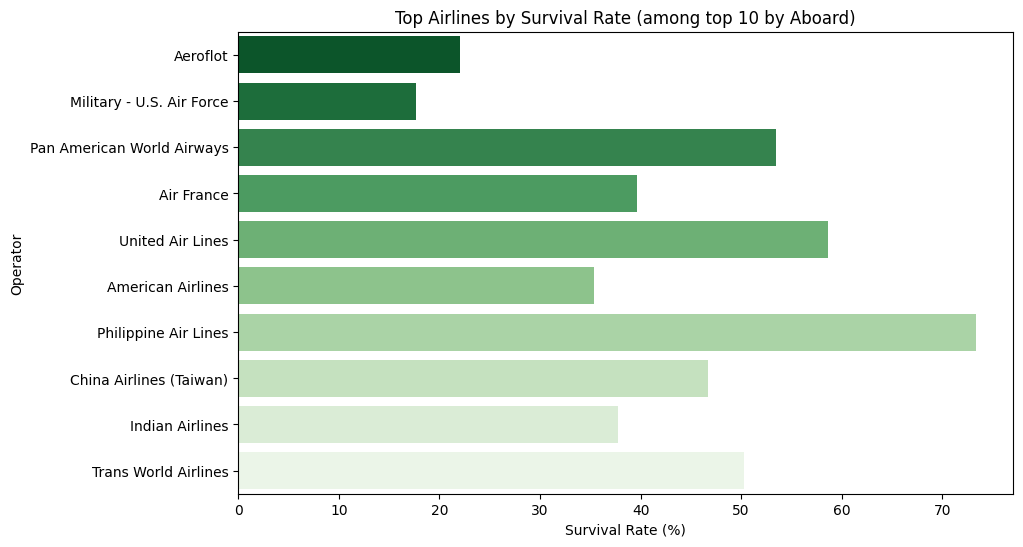

Total Crashes Recorded: 5078
Total Fatalities: 112660
Total Survivors: 45035

Top 5 Airlines by Crashes:
 Operator
Aeroflot                     253
Military - U.S. Air Force    142
Air France                    74
Deutsche Lufthansa            63
United Air Lines              44
Name: count, dtype: int64

Top 5 Airlines by Fatalities:
 Operator
Aeroflot                      8617.0
Military - U.S. Air Force     3401.0
Air France                    1798.0
Pan American World Airways    1562.0
American Airlines             1422.0
Name: Fatalities, dtype: float64

Top 5 Airlines by Survival Rate:
 Operator
Aeroflot                      22.046318
Military - U.S. Air Force     17.651332
Pan American World Airways    53.456496
Air France                    39.657488
United Air Lines              58.594067
Name: Survival Rate (%), dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv("plane_crash.csv")

# Drop unnecessary first column if it contains only "ACCIDENT DETAILS"
if df.columns[0].lower().startswith("accident"):
    df = df.drop(df.columns[0], axis=1)

# -------------------------------
# Data Cleaning
# -------------------------------

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Remove bracketed text in "Fatalities" and "Aboard"
def clean_numeric_column(col):
    return (
        df[col]
        .astype(str)
        .apply(lambda x: re.sub(r"\(.*?\)", "", x))  # remove text inside brackets
        .str.strip()
        .replace("?", None)
    )

df["Fatalities"] = clean_numeric_column("Fatalities").astype(float)
df["Aboard"] = clean_numeric_column("Aboard").astype(float)

# Add Survival column
df["Survivors"] = df["Aboard"] - df["Fatalities"]
df["Survival Rate"] = (df["Survivors"] / df["Aboard"]) * 100

# -------------------------------
# General Analysis
# -------------------------------

# Yearly trend of crashes
df["Year"] = df["Date"].dt.year
yearly_crashes = df.groupby("Year").size()

plt.figure(figsize=(10,5))
plt.plot(yearly_crashes.index, yearly_crashes.values, marker="o")
plt.title("Yearly Plane Crashes")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()

# Yearly fatalities trend
yearly_fatalities = df.groupby("Year")["Fatalities"].sum()
plt.figure(figsize=(10,5))
plt.plot(yearly_fatalities.index, yearly_fatalities.values, color="red", marker="o")
plt.title("Yearly Fatalities")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.grid(True)
plt.show()

# -------------------------------
# Airline-wise Analysis
# -------------------------------

# Top 10 airlines with most crashes
airline_crashes = df["Operator"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=airline_crashes.values, y=airline_crashes.index, palette="Blues_r")
plt.title("Top 10 Airlines with Most Crashes")
plt.xlabel("Number of Crashes")
plt.show()

# Top 10 airlines with most fatalities
airline_fatalities = df.groupby("Operator")["Fatalities"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=airline_fatalities.values, y=airline_fatalities.index, palette="Reds_r")
plt.title("Top 10 Airlines with Most Fatalities")
plt.xlabel("Fatalities")
plt.show()

# Survival rate analysis per airline
airline_survival = (
    df.groupby("Operator")
    .agg({"Aboard": "sum", "Fatalities": "sum", "Survivors": "sum"})
)
airline_survival["Survival Rate (%)"] = (airline_survival["Survivors"] / airline_survival["Aboard"]) * 100
top_survival = airline_survival.sort_values("Aboard", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_survival["Survival Rate (%)"], y=top_survival.index, palette="Greens_r")
plt.title("Top Airlines by Survival Rate (among top 10 by Aboard)")
plt.xlabel("Survival Rate (%)")
plt.show()

# -------------------------------
# Print Some Key Stats
# -------------------------------
print("Total Crashes Recorded:", len(df))
print("Total Fatalities:", int(df["Fatalities"].sum()))
print("Total Survivors:", int(df["Survivors"].sum()))
print("\nTop 5 Airlines by Crashes:\n", airline_crashes.head())
print("\nTop 5 Airlines by Fatalities:\n", airline_fatalities.head())
print("\nTop 5 Airlines by Survival Rate:\n", top_survival["Survival Rate (%)"].head())
